In [17]:
#Import all python package used in the project 
import pandas as pd
import numpy as np 
import os
import matplotlib.pyplot as plt
import datetime
import sys

In [18]:
Archive_clean = pd.read_csv('twitter_archive_master.csv')
imagePrediction_clean=pd.read_csv('imagePrediction_master.csv')

In [25]:
Archive_clean['month'] = Archive_clean['month'].astype(str)

# Data Analysis and Visualization

#### 1. I created dog_stage and rating column in the wrangling step, it's time to look at what type of dog_stage has highest rating.

In [26]:
grouped1 = Archive_clean.groupby(['dog_stage'])['rating'].mean()
grouped1

dog_stage
doggo          1.184722
doggopupper    1.111111
floofer        1.180000
pupper         1.080543
puppo          1.204167
Name: rating, dtype: float64

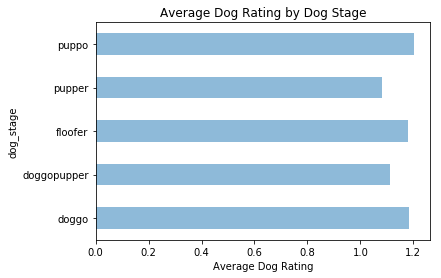

In [27]:
grouped1.plot(kind ='barh', align='center', alpha=0.5)
plt.xlabel('Average Dog Rating')
plt.title('Average Dog Rating by Dog Stage')
plt.show()

### Insight 1
From the Average Dog Rating by Dog Stage bar chart, we can see Puppo has the highest average rating among all stages, which is 1.21. Puppy is too cute to refuse to give a good score, while Pupper has the least average rating.

#### 2. I am also curious to see which factor contributes to high retweet_count and favorite_count

In [28]:
Archive_clean.groupby(['rating_numerator','rating_denominator'])['retweet_count','favorite_count'].mean()

retweet_count  favorite_count
rating_numerator rating_denominator                               
0.0              10                    3387.000000    24242.000000
1.0              10                            NaN             NaN
2.0              10                            NaN             NaN
3.0              10                            NaN             NaN
4.0              10                            NaN             NaN
                 20                            NaN             NaN
5.0              10                            NaN             NaN
6.0              10                    3380.000000    17381.000000
7.0              10                            NaN             NaN
                 11                            NaN             NaN
8.0              10                            NaN             NaN
9.0              10                            NaN             NaN
                 11                            NaN             NaN
10.0             10                    4466.000000    18392.800000
11.0             10                    4177.052632    19654.052632
12.0             10                    4885.980583    22358.223301
13.0             10                    6936.429577    28176.894366
13.5             10                   10189.000000    46366.000000
14.0             10                    7371.550000    29679.250000
24.0             7                             NaN             NaN
26.0             10                            NaN             NaN
27.0             10                            NaN             NaN
44.0             40                            NaN             NaN
45.0             50                            NaN             NaN
50.0             50                            NaN             NaN
60.0             50                            NaN             NaN
75.0             10                            NaN             NaN
80.0             80                            NaN             NaN
84.0             70                            NaN             NaN
88.0             80                            NaN             NaN
99.0             90                            NaN             NaN
121.0            110                           NaN             NaN
144.0            120                           NaN             NaN
165.0            150                           NaN             NaN
204.0            170                           NaN             NaN
420.0            10                            NaN             NaN
1776.0           10                            NaN             NaN

### Insight 2
#### Rating group between 10/10 to 15 /10 have highest average retweet_count and favorite_count, this is not surprising since most of tweets' rating are within this range. However, there are some outliers that can be spotted on, such as 0/10,5/10,6/10 tweets actually have really high retweet_count and favorite_count, especially 6/10 rating's tweet. This shows low rating intrigue people's tweeting passion more than extreme high rating,for example 666/10 and 182/10.

#### Also, time study about rating, retweet_count and favorite_count is interesting

In [29]:
Archive_clean.groupby(['month'])['rating','retweet_count','favorite_count'].mean()

,rating,retweet_count,favorite_count
month,,,
201511,1.031081,NaN,NaN
201512,0.964247,NaN,NaN
201601,1.022057,NaN,NaN
201602,1.014876,NaN,NaN
201603,1.051515,NaN,NaN
201604,1.055000,NaN,NaN
201605,1.089831,NaN,NaN
201606,1.039091,NaN,NaN
201607,2.926042,NaN,NaN


#### Above table shows that there are no retweet_count and favorite_count date before 2017 february. Let's create a line chart for month and rating data.

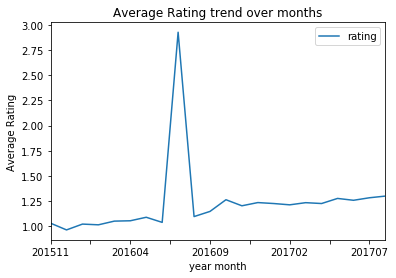

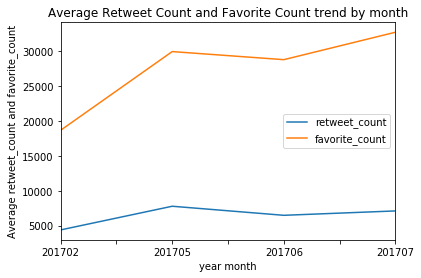

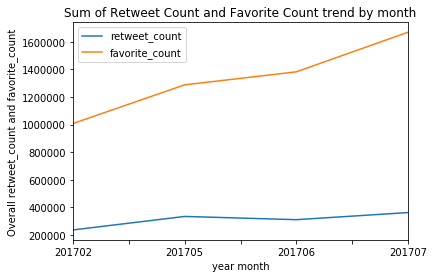

In [30]:
grouped2 =Archive_clean.groupby(['month'])['rating'].mean()
grouped3 =Archive_clean[Archive_clean['month'].isin(['201702','201703''201704','201705','201706','201707'])].groupby(['month'])['retweet_count','favorite_count'].mean()
grouped4 =Archive_clean[Archive_clean['month'].isin(['201702','201703''201704','201705','201706','201707'])].groupby(['month'])['retweet_count','favorite_count'].sum()

grouped2.plot(kind ='line')
plt.title('Average Rating trend over months')
plt.ylabel('Average Rating')
plt.xlabel('year month')
plt.legend()
plt.show()

grouped3.plot(kind ='line')
plt.title('Average Retweet Count and Favorite Count trend by month')
plt.ylabel('Average retweet_count and favorite_count')
plt.xlabel('year month')
plt.legend()
plt.show()

grouped4.plot(kind ='line')
plt.title('Sum of Retweet Count and Favorite Count trend by month')
plt.ylabel('Overall retweet_count and favorite_count')
plt.xlabel('year month')
plt.legend()
plt.show()

### Insight 3
#### There is interesting pattern in the above graphs. In Average Rating trend over months line chart, there is two peaks, one is around 201607 and another is around 201704. 201607 has average rating 2.77 and 201704 has 3.0, there must be some outlier rating which makes average rating so high.

In [31]:
Archive_clean[Archive_clean['month'] == 201607].groupby(['month'])['rating'].mean()

Series([], Name: rating, dtype: float64)

In [32]:
Archive_clean[Archive_clean['month'] == 201704].groupby(['month'])['rating'].mean()

Series([], Name: rating, dtype: float64)

In [33]:
Archive_clean[Archive_clean['month'] == 201607]['rating_numerator'].value_counts()

Series([], Name: rating_numerator, dtype: int64)

I was right, one 1776 rating make average rating sky high in this months.
Additionally, average Retweet Count and Favorite Count are increasing from 201702 to 201708, but the overall summary of  Retweet Count and Favorite Count are increasing 201706, then decreasing.

#### 3. I also am interested to answer these questions  in  image prediction table,
    what is top 5 breed of dog has the highest right confidence probablity for 3 prediction?
    which num of image has the count of most_confident_img_num?
    what's the dog breed prediction rate among 3 dog indicators?  
    which breed of dog have the highest rating?

In [34]:
p1 = imagePrediction_clean[imagePrediction_clean['dogbreed_indicator1'] ==True].groupby(['prediction1'])['prediction_confidence1'].mean()
p2 = imagePrediction_clean[imagePrediction_clean['dogbreed_indicator1'] ==True].groupby(['prediction2'])['prediction_confidence2'].mean()
p3 = imagePrediction_clean[imagePrediction_clean['dogbreed_indicator1'] ==True].groupby(['prediction3'])['prediction_confidence3'].mean()

In [35]:
p1.nlargest(5)

prediction1
komondor            0.972567
clumber             0.946700
brittany_spaniel    0.874557
keeshond            0.844450
bull_mastiff        0.815600
Name: prediction_confidence1, dtype: float64

In [36]:
p2.nlargest(5)

prediction2
giant_schnauzer       0.288000
standard_schnauzer    0.285300
sea_lion              0.275600
cairn                 0.265775
kerry_blue_terrier    0.250000
Name: prediction_confidence2, dtype: float64

In [37]:
p3.nlargest(5)

prediction3
briard         0.1930
box_turtle     0.1643
feather_boa    0.1593
mitten         0.1389
conch          0.1303
Name: prediction_confidence3, dtype: float64

#### There is no dog breed in 3 top 5 list at the same time, schnauzer has pretty high confidence rate in prediction2.

In [38]:
imagePrediction_clean['most_confident_img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: most_confident_img_num, dtype: int64

#### As predicted, prediction1 has the highest count of most_confident_img_num.

In [39]:
#Get dog breed prediciton percetage
len(imagePrediction_clean[imagePrediction_clean['dogbreed_indicator1'] ==True])/len(imagePrediction_clean)

0.7334939759036144

In [40]:
len(imagePrediction_clean[imagePrediction_clean['dogbreed_indicator2'] ==True])/len(imagePrediction_clean)

0.7397590361445783

In [41]:
len(imagePrediction_clean[imagePrediction_clean['dogbreed_indicator3'] ==True])/len(imagePrediction_clean)

0.7151807228915663

#### The prediction ratte for 3 dog breed are from 71.5% to 73.3%. Among 3 prediction of dog breed column, dogbreed_indicator2 has the highest dog breed prediction rate. 

In [42]:
#Merge Archive_clean and  imagePrediction table
Archive_clean = pd.merge(Archive_clean, imagePrediction_clean,
                            on=['tweet_id'], how='left')

In [43]:
Archive_clean.tail(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,most_confident_img_num,prediction1,prediction_confidence1,dogbreed_indicator1,prediction2,prediction_confidence2,dogbreed_indicator2,prediction3,prediction_confidence3,dogbreed_indicator3
2094,666033412701032449,2015-11-15 23:21:54,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9.0,10,NaN,NaN,NaN,...,1.0,german_shepherd,0.5965,True,malinois,0.1386,True,bloodhound,0.1162,True
2095,666029285002620928,2015-11-15 23:05:30,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7.0,10,NaN,NaN,NaN,...,1.0,redbone,0.5068,True,miniature_pinscher,0.0742,True,rhodesian_ridgeback,0.0720,True
2096,666020888022790149,2015-11-15 22:32:08,Twitter for iPhone,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8.0,10,NaN,NaN,NaN,...,1.0,welsh_springer_spaniel,0.4651,True,collie,0.1567,True,shetland_sheepdog,0.0614,True


In [44]:
b1 =Archive_clean[Archive_clean['dogbreed_indicator1'] ==True].groupby(['prediction1'])['rating'].mean()
b2 =Archive_clean[Archive_clean['dogbreed_indicator2'] ==True].groupby(['prediction2'])['rating'].mean()
b3 =Archive_clean[Archive_clean['dogbreed_indicator3'] ==True].groupby(['prediction3'])['rating'].mean()
b1.nlargest(10)
#List top 10 dog breed

prediction1
clumber               2.700000
pomeranian            1.286842
saluki                1.250000
briard                1.233333
tibetan_mastiff       1.225000
border_terrier        1.214286
kuvasz                1.200000
silky_terrier         1.200000
standard_schnauzer    1.200000
eskimo_dog            1.177778
Name: rating, dtype: float64

In [47]:
b2.nlargest(10)

prediction2
tibetan_mastiff         1.335238
afghan_hound            1.225000
doberman                1.220000
norwich_terrier         1.200000
appenzeller             1.200000
bernese_mountain_dog    1.200000
dalmatian               1.200000
entlebucher             1.200000
saluki                  1.200000
scotch_terrier          1.200000
Name: rating, dtype: float64

In [48]:
b3.nlargest(10)

prediction3
chow                       1.356667
bouvier_des_flandres       1.300000
kerry_blue_terrier         1.300000
black-and-tan_coonhound    1.266667
briard                     1.200000
leonberg                   1.200000
standard_schnauzer         1.200000
sussex_spaniel             1.200000
basenji                    1.195000
rottweiler                 1.190000
Name: rating, dtype: float64

### Insight 4
#### This three lists show the preference of weRateDog tweeter. we can see clumber is undoubtly his favorate dog breed, then pomeranian, saluki shows up in both prediction, so are tibetan_mastiff and standard_schnauzer. 